In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
astros = pd.read_csv('/Users/tylersmith/Desktop/STAT386/semester_project/astros.csv')
astros

,Gm#,Date,Tm,Home/Road,Opp,W/L,R,RA,Inn,W-L,...,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Season,Time_minutes
0,1,"Thursday, Mar 30",HOU,vs,CHW,L,2,3,9.0,0-1,...,Graveman,Pressly,López,2:38,N,43032.0,0.92,-,2023,158
1,2,"Friday, Mar 31",HOU,vs,CHW,W,6,3,9.0,1-1,...,Martinez,Graveman,Montero,2:40,N,41453.0,0.92,+,2023,160
2,3,"Saturday, Apr 1",HOU,vs,CHW,W,6,4,9.0,2-1,...,Stanek,Kelly,Neris,3:11,D,37519.0,0.93,++,2023,191
3,4,"Sunday, Apr 2",HOU,vs,CHW,L,3,6,9.0,2-2,...,Clevinger,Garcia,NaN,3:06,D,42835.0,1.00,-,2023,186
4,5,"Monday, Apr 3",HOU,vs,DET,L,6,7,11.0,2-3,...,Wingenter,Neris,Hill,3:21,N,29272.0,0.93,--,2023,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,158,"Wednesday, Sep 27",HOU,@,TEX,W,12,2,9.0,98-60,...,Verlander,Martinez,NaN,3:17,D,26053.0,0.18,+++,2017,197
1028,159,"Thursday, Sep 28",HOU,@,BOS,W,12,2,9.0,99-60,...,Peacock,Rodriguez,NaN,3:31,N,34222.0,0.10,++++,2017,211
1029,160,"Friday, Sep 29",HOU,@,BOS,W,3,2,9.0,100-60,...,Morton,Fister,Giles,2:47,N,36623.0,0.07,+++++,2017,167
1030,161,"Saturday, Sep 30",HOU,@,BOS,L,3,6,9.0,100-61,...,Pomeranz,McCullers,NaN,3:19,D,35722.0,0.14,-,2017,199


In [3]:
# View data types for all columns
astros.dtypes

Gm#               int64
Date             object
Tm               object
Home/Road        object
Opp              object
W/L              object
R                 int64
RA                int64
Inn             float64
W-L              object
Rank              int64
GB               object
Win              object
Loss             object
Save             object
Time             object
D/N              object
Attendance      float64
cLI             float64
Streak           object
Season            int64
Time_minutes      int64
dtype: object

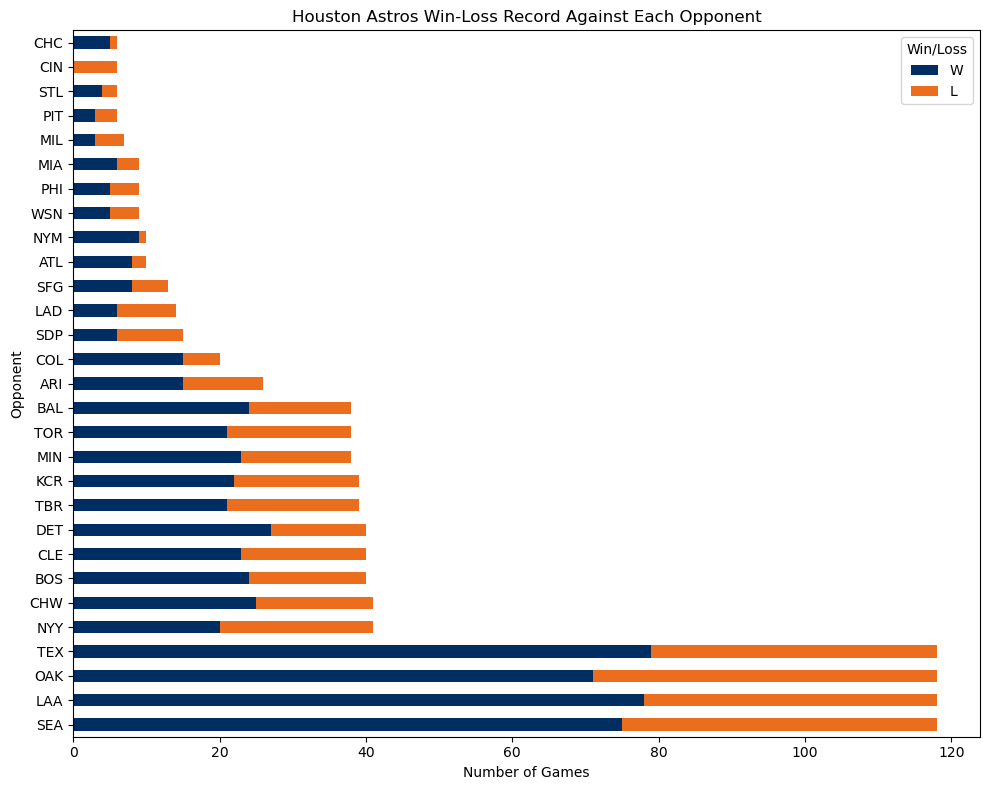

W/L   L  L*   W  W*  Total_Games
Opp                             
SEA  43   1  75   7          118
LAA  40   7  78   3          118
OAK  47   8  71   4          118
TEX  39   4  79   4          118
NYY  21   3  20   2           41
CHW  16   1  25   2           41
BOS  16   1  24   1           40
CLE  17   2  23   1           40
DET  13   2  27   1           40
TBR  18   0  21   2           39
KCR  17   1  22   4           39
MIN  15   2  23   0           38
TOR  17   0  21   3           38
BAL  14   1  24   2           38
ARI  11   3  15   1           26
COL   5   1  15   1           20
SDP   9   1   6   1           15
LAD   8   0   6   0           14
SFG   5   0   8   0           13
ATL   2   1   8   0           10
NYM   1   0   9   0           10
WSN   4   0   5   1            9
PHI   4   0   5   0            9
MIA   3   0   6   0            9
MIL   4   0   3   0            7
PIT   3   1   3   0            6
STL   2   0   4   0            6
CIN   6   1   0   0            6
CHC   1   

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'astros' is your DataFrame with the relevant data already loaded

# Calculate win-loss counts
win_loss_counts = astros.groupby(['Opp', 'W/L']).size().unstack(fill_value=0)

# Handle possible variations in the 'W/L' column like 'W*' or 'L*'
win_loss_counts['W'] = win_loss_counts.get('W', 0) + win_loss_counts.get('W*', 0)
win_loss_counts['L'] = win_loss_counts.get('L', 0) + win_loss_counts.get('L*', 0)

# Add a new column for total games played against each opponent
win_loss_counts['Total_Games'] = win_loss_counts['W'] + win_loss_counts['L']

# Sort by total games in descending order so that the team with the most games will be first in the DataFrame
win_loss_counts.sort_values(by='Total_Games', ascending=False, inplace=True)

# Get the opponent names for the y-axis labels before resetting the index
opponents = win_loss_counts.index

# Custom colors for the bars
colors = ['#002D62', '#EB6E1F']  # Blue for 'W', Orange for 'L'

# Plotting the sorted win-loss counts as a horizontal bar plot with custom colors
win_loss_counts[['W', 'L']].plot(kind='barh', stacked=True, color=colors, figsize=(10, 8), legend='reverse')

# Plot customization
plt.title('Houston Astros Win-Loss Record Against Each Opponent')
plt.yticks(range(len(opponents)), opponents)  # Set the y-ticks to show opponent names
plt.ylabel('Opponent')
plt.xlabel('Number of Games')
plt.legend(title='Win/Loss')
plt.tight_layout()

# Uncomment the line below to save the figure
# plt.savefig('houston_astros_win_loss_record.png')

plt.show()

print(win_loss_counts)


In [7]:
# Perform the groupby operation and ensure 'W' and 'L' are present
win_loss_counts = astros.groupby('Opp')['W/L'].value_counts().unstack(fill_value=0)[['W', 'L']]

# Calculate win percentage
win_loss_counts['Win_Percentage'] = win_loss_counts['W'] / (win_loss_counts['W'] + win_loss_counts['L'])

# Sort by win percentage
win_loss_counts = win_loss_counts.sort_values(by='Win_Percentage', ascending=False)


In [8]:
# Perform the groupby operation and ensure 'W' and 'L' are present
win_loss_counts = astros.groupby('Opp')['W/L'].value_counts().unstack(fill_value=0)[['W', 'L']]

# Calculate win percentage
win_loss_counts['Win_Percentage'] = win_loss_counts['W'] / (win_loss_counts['W'] + win_loss_counts['L'])

# Sort by win percentage
win_loss_counts = win_loss_counts.sort_values(by='Win_Percentage', ascending=False)
win_loss_counts



W/L,W,L,Win_Percentage
Opp,,,
NYM,9,1,0.900000
ATL,8,1,0.888889
CHC,4,1,0.800000
COL,14,4,0.777778
DET,26,11,0.702703
LAA,75,33,0.694444
TEX,75,35,0.681818
STL,4,2,0.666667
MIA,6,3,0.666667


In [ ]:
# Perform the groupby operation and ensure 'W' and 'L' are present
win_loss_counts = astros.groupby('Opp')['W/L'].value_counts().unstack(fill_value=0)[['W', 'L']]

# Convert 'W' and 'L' to integers
win_loss_counts['W'] = win_loss_counts['W'].astype(int)
win_loss_counts['L'] = win_loss_counts['L'].astype(int)

# Calculate win percentage, round to three decimal places, and rename the column
win_loss_counts['Win%'] = (win_loss_counts['W'] / (win_loss_counts['W'] + win_loss_counts['L'])).round(3)

# Filter for specific teams
teams = ['SEA', 'TEX', 'OAK', 'LAA']
filtered_win_loss_counts = win_loss_counts.loc[teams]

# Sort by win percentage
filtered_win_loss_counts = filtered_win_loss_counts.sort_values(by='Win%', ascending=False)

# Print the DataFrame to verify the result
print(filtered_win_loss_counts)

# Save the DataFrame as an image
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visualization
sns.set_theme()

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Convert DataFrame values to string for displaying in the table, keeping 'Win%' as float
table_data = filtered_win_loss_counts.applymap(lambda x: f"{x:.0f}" if isinstance(x, int) else x)

# Plot the DataFrame as a table
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, rowLabels=table_data.index, cellLoc = 'center', loc='center')

# Adjust table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Save the figure
plt.savefig('al_west_table.png')



In [ ]:
max_percentage = win_loss_counts.loc[win_loss_counts['Win_Percentage'].idxmax()]
min_percentage = win_loss_counts.loc[win_loss_counts['Win_Percentage'].idxmin()]

print(max_percentage)
print(min_percentage)

In [ ]:
astros.value_counts('W/L')

In [ ]:
# Calculate total wins and losses (including walk-offs)
total_wins = (astros['W/L'] == 'W').sum() + (astros['W/L'] == 'W*').sum()
total_losses = (astros['W/L'] == 'L').sum() + (astros['W/L'] == 'L*').sum()

In [ ]:

data = {
    'Result': ['Wins', 'Losses'],
    'Total': [total_wins, total_losses]
}
results_df = pd.DataFrame(data)

# Now let's create the bar plot
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Result', y='Total', data=results_df)

# Optional: Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Total Wins and Losses for Houston Astros')
plt.show()


In [ ]:
win_percentage = round(total_wins / (total_wins + total_losses),3)
win_percentage

In [ ]:
average_time_by_season = astros.groupby('Season')['Time_minutes'].mean().reset_index()
average_time_by_season = average_time_by_season.rename(columns={'Time_minutes': 'Time (Minutes)'})
average_time_by_season['Time (Minutes)'] = average_time_by_season['Time (Minutes)'].round(2)
print(average_time_by_season)

# Create a line chart with Seaborn
sns.lineplot(data=average_time_by_season, x='Season', y='Time (Minutes)', color = '#002D62')

# Label your axes and give a title to the plot
plt.xlabel('Season')
plt.ylabel('Average Time in Minutes')
plt.title('Average Game Time by Season')

# Save the figure in the 'semester_project' directory with the specified filename.
plt.savefig('average_game_time_by_season.png', format='png', dpi=300)

# Display the plot
plt.show()

In [ ]:
# To adjust your code to ensure that walk-off wins ('W*') and losses ('L*') are counted as regular wins ('W') and losses ('L'),
# you can modify the groupby operation to count 'W' and 'W*' together and 'L' and 'L*' together.

# Create a new column that normalizes 'W/L' to just 'W' or 'L', regardless of walk-offs
astros['Normalized_WL'] = astros['W/L'].str[0]

# Create a DataFrame to count wins and losses
win_loss_counts = astros.groupby(['Opp', 'Normalized_WL']).size().unstack(fill_value=0)

# Reset index to turn 'Opp' back into a column
win_loss_counts = win_loss_counts.reset_index()

# Use your existing division mapping
divisions_to_teams = {
    'AL East': ['NYY', 'BAL', 'TOR', 'BOS', 'TB'],
    'AL Central': ['CLE', 'DET', 'CHW', 'KCR', 'MIN'],
    'AL West': ['HOU', 'LAA', 'OAK', 'SEA', 'TEX'],
    'NL East': ['NYM', 'ATL', 'MIA', 'PHI', 'WSN'],
    'NL Central': ['CHC', 'MIL', 'CIN', 'PIT', 'STL'],
    'NL West': ['LAD', 'SDP', 'SFG', 'COL', 'ARI']
}

# Reverse the mapping: create a dictionary with team abbreviations as keys and their divisions as values.
team_to_division_mapping = {team: division for division, teams in divisions_to_teams.items() for team in teams}

# Use the new mapping with the map function to get the division for each opponent
win_loss_counts['Division'] = win_loss_counts['Opp'].map(team_to_division_mapping)

# Group by the new Division column and sum Wins and Losses
division_group = win_loss_counts.groupby('Division').sum()

# Calculate win percentage for each division
division_group['Win_Percentage'] = division_group['W'] / (division_group['W'] + division_group['L'])

# Sort
division_group = division_group.sort_values(by = 'Win_Percentage', ascending = False)

# Print the win percentage for each division
print(division_group[['W', 'L', 'Win_Percentage']])


In [ ]:
# Reset the index of the division_group DataFrame to make 'Division' a column again
division_group = division_group.reset_index()

# Sort the DataFrame by 'Win_Percentage' from highest to lowest
division_group_sorted = division_group.sort_values('Win_Percentage', ascending=False)

# Create a horizontal bar plot with Astros colors
plt.figure(figsize=(12, 8))  # Increase the figure size
barplot = sns.barplot(x='Win_Percentage', y='Division', data=division_group_sorted, palette=['#002D62', '#EB6E1F'])

# Add title and labels
plt.title('Win Percentage by Division')
plt.xlabel('Win Percentage')
plt.ylabel('Division')

# Annotate each bar with the value of the win percentage
for p in barplot.patches:
    width = p.get_width()  # get the width of each bar
    plt.text(width if width > 0.01 else 0.01,  # position text slightly right of the bar's end if width is greater than 0.01
             p.get_y() + p.get_height() / 2,  # position text at the center height of the bar
             f'{width:.3f}',  # format text with 3 decimal places
             ha = 'left', va = 'center')  # align the text to the left

# Display the plot
plt.tight_layout()  # Adjust the plot to make sure everything fits without overlapping
plt.savefig('win_percentage_by_division.png', format='png', dpi=300)
plt.show()


In [ ]:
avg_runs_per_game = astros.groupby('Season')['R'].mean().reset_index()
avg_runs_per_game

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_runs_per_game, x='Season', y='R')
plt.title('Average Runs per Game (2017-2023)')
plt.xlabel('Season')
plt.ylabel('Average Runs per Game')
plt.xticks(avg_runs_per_game['Season'])  # This ensures that all years are shown on the x-axis.
plt.grid(True)  # Optional: adds a grid to the chart for better readability
plt.show()

In [ ]:
avg_runs_allowed_per_game = astros.groupby('Season')['RA'].mean().reset_index()
avg_runs_allowed_per_game

In [ ]:
sns.lineplot(data= avg_runs_allowed_per_game, x='Season', y= 'RA')
plt.title('Average Runs Allowed per Game (2017-2023)')
plt.xlabel('Season')
plt.ylabel('Average Runs per Game')
plt.xticks(avg_runs_allowed_per_game['Season'])  # This ensures that all years are shown on the x-axis.
plt.grid(True)  # Optional: adds a grid to the chart for better readability
plt.show()

In [ ]:
total_runs_by_season = astros.groupby('Season')['R'].sum().reset_index()
print(total_runs_by_season)

total_runs_allowed_by_season = astros.groupby('Season')['RA'].sum().reset_index()
print(total_runs_allowed_by_season)

In [ ]:
# Filter out the 2020 season
total_runs_by_season = total_runs_by_season[total_runs_by_season['Season'] != 2020]
total_runs_allowed_by_season = total_runs_allowed_by_season[total_runs_allowed_by_season['Season'] != 2020]

# Set the style of the seaborn plot
sns.set_style("whitegrid")

# Create a figure and a set of subplots
plt.figure(figsize=(10, 6))

# Plot total runs by season, excluding 2020
sns.lineplot(data=total_runs_by_season, x='Season', y='R', label='Runs Scored', marker='o')

# Plot total runs allowed by season, excluding 2020
sns.lineplot(data=total_runs_allowed_by_season, x='Season', y='RA', label='Runs Allowed', marker='o')

# Add some helpful labels and title to the plot
plt.title('Total Runs and Runs Allowed by Season (excluding 2020)')
plt.xlabel('Season')
plt.ylabel('Total Runs')

# Ensure that every season is represented on the x-axis, excluding 2020
plt.xticks(total_runs_by_season['Season'])

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()



In [ ]:
rank_counts = astros['Rank'].value_counts()
rank_counts

In [ ]:
# The Astros were in last place for two games early in the 2021 season
last_place_rows = astros[astros['Rank'] == 5]
last_place_rows

In [ ]:
# Set the style of the seaborn plot
sns.set_style("whitegrid")

# Create a bar chart for the rank counts with all bars set to a darker orange
plt.figure(figsize=(10, 6))
sns.barplot(x=rank_counts.index, y=rank_counts.values, color="#EB6E1F")  # Set bars to darker orange

# Add some helpful labels and title to the plot
plt.title('Number of Games Spent at Each Division Rank')
plt.xlabel('Division Rank')
plt.ylabel('Number of Games')

plt.savefig('division_ranks.png', format='png', dpi=300)
# Show the plot
plt.show()


In [ ]:
print(astros[astros['R'] == 23])

In [ ]:
astros['RA'].value_counts()

In [ ]:
# Count the number of games where opponents scored fewer than 3 runs
games_under_5_runs = astros['RA'][astros['RA'] < 5].count()

# Total number of games
total_games = astros['RA'].count()

# Calculate the proportion
proportion_under_3_runs = games_under_5_runs / total_games

# Print the result
print("Proportion of games where Astros held opponents under 5 runs:", proportion_under_3_runs)


In [ ]:
# Count the number of games where opponents scored fewer than 3 runs
games_under_5_runs = astros['R'][astros['RA'] > 5].count()

# Total number of games
total_games = astros['R'].count()

# Calculate the proportion
proportion_under_3_runs = games_under_5_runs / total_games

# Print the result
print("Proportion of games where Astros scored more than 5 runs:", proportion_under_3_runs)

In [ ]:
# Set the style of the seaborn plot
sns.set_style("whitegrid")

# Create the histogram for the distribution of runs scored
plt.figure(figsize=(14, 8))  # Adjust the figure size to accommodate the number of bins
sns.histplot(astros['RA'], kde=False, color='#EB6E1F', bins=24)  # 24 bins for 0 to 23 runs

# Add some helpful labels and title to the plot
plt.title('Distribution of Runs Allowed by the Astros')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')

# Since we know the range of runs, we can set the x-ticks to show each run value
plt.xticks(range(24))  # This sets the x-axis ticks to show each run total

# Show the plot
plt.show()

In [ ]:
# Set the style of the seaborn plot
sns.set_style("whitegrid")

# Create a figure with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

# Plot for distribution of runs allowed
sns.histplot(astros['RA'], kde=False, color='#EB6E1F', bins=24, ax=axs[0])  # Plot on the first subplot
axs[0].set_title('Distribution of Runs Allowed by the Astros')
axs[0].set_xlabel('Runs Allowed')
axs[0].set_ylabel('Frequency')
axs[0].set_xticks(range(24))  # Set x-axis ticks

# Plot for distribution of runs scored
sns.histplot(astros['R'], kde=False, color='#002D62', bins=24, ax=axs[1])  # Plot on the second subplot
axs[1].set_title('Distribution of Runs Scored by the Astros')
axs[1].set_xlabel('Runs Scored')
axs[1].set_ylabel('Frequency')
axs[1].set_xticks(range(24))  # Set x-axis ticks

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('runs.png', format='png', dpi=300)

# Show the plot
plt.show()

In [ ]:
import pandas as pd
from datetime import datetime
import re  # Import the regex module

# Define a function to convert the date strings to datetime objects, assuming the current year
def convert_dates(date_series):
    converted_dates = pd.Series(index=date_series.index, dtype="datetime64[ns]")
    date_format = '%A, %b %d'  # Date format without the year
    for i, date_str in enumerate(date_series):
        date_str = date_str.strip()  # Remove any leading/trailing whitespace
        # Use regex to remove parentheses and any content within them
        date_str = re.sub(r'\(\d+\)', '', date_str)
        try:
            # Parse the date string into a datetime object
            converted_date = datetime.strptime(date_str, date_format)
            # Assume the year of the date is the current year
            converted_date = converted_date.replace(year=datetime.now().year)
            # Assign the converted date to the series
            converted_dates[i] = converted_date
        except ValueError as e:
            # If there's an error, print it and skip this date
            print(f"Error converting date at index {i}: {e}")
            continue
    return converted_dates

# Load your data into a dataframe (replace 'path_to_your_csv_file' with your actual file path)
astros = pd.read_csv('/Users/tylersmith/Desktop/STAT386/semester_project/astros.csv')

# Convert the 'Date' column using the convert_dates function
astros['Date'] = convert_dates(astros['Date'])

# Extract the month from the 'Date' column
astros['Month'] = astros['Date'].dt.strftime('%B')

# Group by the 'Month' column and calculate Wins, Losses, and Win percentage
month_record = astros.groupby('Month').agg(
    Wins=('W/L', lambda x: (x.str.startswith('W')).sum()),  # Count 'W' and 'W*'
    Losses=('W/L', lambda x: (x.str.startswith('L')).sum())  # Count 'L' and 'L*'
)

# Calculate win percentage
month_record['Win_Percentage'] = month_record['Wins'] / (month_record['Wins'] + month_record['Losses'])

# Reset index
month_record.reset_index(inplace=True)

# Sort by Win Percentage
month_record.sort_values(by = 'Win_Percentage', ascending=False)

month_record = month_record.sort_values(by='Win_Percentage', ascending=False)

# Print or return the final grouped dataframe
print(month_record)


In [ ]:
# Create a horizontal bar plot with Astros colors
plt.figure(figsize=(12, 8))  # Increase the figure size
barplot = sns.barplot(x='Win_Percentage', y='Month', data=month_record, palette=['#002D62', '#EB6E1F'])

# Add title and labels
plt.title('Win Percentage by Month')
plt.xlabel('Win Percentage')
plt.ylabel('Month')

# Annotate each bar with the value of the win percentage
for p in barplot.patches:
    width = p.get_width()  # get the width of each bar
    plt.text(width if width > 0.01 else 0.01,  # position text slightly right of the bar's end if width is greater than 0.01
             p.get_y() + p.get_height() / 2,  # position text at the center height of the bar
             f'{width:.3f}',  # format text with 3 decimal places
             ha = 'left', va = 'center')  # align the text to the left

# Display the plot
plt.tight_layout()  # Adjust the plot to make sure everything fits without overlapping
plt.show()

In [ ]:
# Group by the 'Season' column and calculate Wins, Losses, and Win percentage
astros_season_record = astros.groupby('Season').agg(
    Wins=('W/L', lambda x: (x.str.startswith('W')).sum()),  # Count 'W' and 'W*'
    Losses=('W/L', lambda x: (x.str.startswith('L')).sum())  # Count 'L' and 'L*'
)

# Calculate win percentage
astros_season_record['Win_Percentage'] = astros_season_record['Wins'] / (astros_season_record['Wins'] + astros_season_record['Losses'])

# Sort the records by 'Win_Percentage' in descending order to have the highest percentage on top
astros_season_record_sorted = astros_season_record.sort_values(by='Win_Percentage', ascending=False)

# Reset index if you want 'Season' as a column
astros_season_record_sorted.reset_index(inplace=True)

# Print or return the sorted DataFrame
print(astros_season_record_sorted)


In [ ]:
# Exclude the 2020 season
astros_season_record_filtered = astros_season_record_sorted[astros_season_record_sorted['Season'] != 2020]

# Plotting the line chart using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Season', y='Wins', data=astros_season_record_filtered, marker='o', label='Wins', color = '#002D62')
sns.lineplot(x='Season', y='Losses', data=astros_season_record_filtered, marker='o', label='Losses', color = '#EB6E1F')

plt.title('Houston Astros Wins and Losses by Season')
plt.xlabel('Season')
plt.ylabel('Number of Wins/Losses')

# Set y-axis to start at 60 and intervals of 5
y_max = max(astros_season_record_filtered['Wins'].max(), astros_season_record_filtered['Losses'].max())
plt.ylim(40, y_max)
plt.yticks(range(40, y_max + 5, 5))

plt.legend()
plt.grid(True)
plt.savefig('season_overall_records.png', format='png', dpi=300)
plt.show()




In [ ]:
# Group by 'Season' and 'Month' and calculate Wins (including walk-offs), Losses (including walk-offs), and Win percentage
astros_month_season_record = astros.groupby(['Season', 'Month']).agg(
    Wins=('W/L', lambda x: (x.str.startswith('W')).sum()),  # Count 'W' and 'W*'
    Losses=('W/L', lambda x: (x.str.startswith('L')).sum())  # Count 'L' and 'L*'
)

# Calculate win percentage
astros_month_season_record['Win_Percentage'] = astros_month_season_record['Wins'] / (astros_month_season_record['Wins'] + astros_month_season_record['Losses'])

# Sort the records within each season by month and then by 'Win_Percentage' in descending order
astros_month_season_record_sorted = astros_month_season_record.sort_values(by=['Season', 'Month', 'Win_Percentage'], ascending=[True, True, False])

# Reset index to turn the MultiIndex into columns
astros_month_season_record_sorted.reset_index(inplace=True)

# Print or return the sorted DataFrame
print(astros_month_season_record_sorted)


In [ ]:
# Replace the space between '+' and the number with no space
astros['GB'] = astros['GB'].str.replace(r'\+\s', '+', regex=True)

# Check the output
print(astros['GB'].unique())


In [ ]:
astros.dtypes

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Dictionary to store plot objects
season_plots = {}

# Loop through each season from 2017 to 2023
for season in range(2017, 2024):
    # Filter for the specific season
    astros_season = astros[astros['Season'] == season]
    
    # Clean the 'GB' column
    astros_season['GB'] = astros_season['GB'].astype(str)
    astros_season['GB_Clean'] = astros_season['GB'].replace('Tied', '0').str.replace(r'\+', '', regex=True)
    astros_season['GB_Clean'] = pd.to_numeric(astros_season['GB_Clean'], errors='coerce')
    astros_season['GB_Clean'] = astros_season['GB_Clean'] * astros_season['GB'].str.contains(r'\+').map({True: 1, False: -1})
    astros_season['color'] = ['green' if x >= 0 else 'red' for x in astros_season['GB_Clean']]
    
    # Find the max lead and deficit
    max_lead = astros_season['GB_Clean'].max()
    max_deficit = astros_season['GB_Clean'].min()

    # Create the figure and axis objects for the plot
    fig, ax = plt.subplots(figsize=(20, 10))
    
    # Plot the data
    ax.bar(astros_season['Gm#'], astros_season['GB_Clean'], color=astros_season['color'])
    ax.axhline(y=0, color='black', linewidth=1.5)
    ax.set_xlabel('Games')
    ax.set_ylabel('Games Behind (-) / Lead (+)')
    ax.set_title(f'Houston Astros {season} Division Lead/Trail')
    ax.text(0.5, 0.9, f'Max Lead: {max_lead} games\nMax Deficit: {max_deficit} games', 
             horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    
    # Save the figure object in the dictionary
    season_plots[season] = fig
    
    # Optionally, display the plot
    plt.show()

    # Close the plot to save memory
    plt.close(fig)

    # Access specific plots with season_plots['Season']


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'astros' is your DataFrame with the relevant data

# Create a 4x2 grid of subplots to accommodate 7 seasons
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))  # Adjusted figsize for better fit
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each season from 2017 to 2023
for idx, season in enumerate(range(2017, 2024)):
    ax = axes[idx]
    
    # Filter for the specific season
    astros_season = astros[astros['Season'] == season]
    
    # Clean the 'GB' column
    astros_season['GB'] = astros_season['GB'].astype(str)
    astros_season['GB_Clean'] = astros_season['GB'].replace('Tied', '0').str.replace(r'\+', '', regex=True)
    astros_season['GB_Clean'] = pd.to_numeric(astros_season['GB_Clean'], errors='coerce')
    astros_season['GB_Clean'] = astros_season['GB_Clean'] * astros_season['GB'].str.contains(r'\+').map({True: 1, False: -1})
    astros_season['color'] = ['green' if x >= 0 else 'red' for x in astros_season['GB_Clean']]
    
    # Find the max lead and deficit
    max_lead = astros_season['GB_Clean'].max()
    max_deficit = astros_season['GB_Clean'].min()

    # Plot the data
    ax.bar(astros_season['Gm#'], astros_season['GB_Clean'], color=astros_season['color'], alpha=0.75)  # Set alpha for consistent color
    ax.axhline(y=0, color='black', linewidth=1.5)
    ax.set_xlabel('Games')
    ax.set_ylabel('Games Behind (-) / Lead (+)')
    ax.set_title(f'Houston Astros {season} Division Lead/Trail')
    ax.text(0.5, 0.9, f'Max Lead: {max_lead} games\nMax Deficit: {max_deficit} games', 
            horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

# Hide the last subplot which is not used
fig.delaxes(axes[-1])

# Adjust the layout
plt.tight_layout()

plt.savefig('division_leads_deficits.png', format='png', dpi=300)

# Display the combined plot
plt.show()




In [ ]:
season_plots[2017]

In [ ]:
season_plots[2022]

In [ ]:
# Show results of home and away
astros.groupby(['Home/Road', 'W/L']).size().unstack(fill_value=0)

# Adjusting the 'W/L' column to combine 'W*' with 'W' and 'L*' with 'L'
astros['Adjusted W/L'] = astros['W/L'].replace({'W*': 'W', 'L*': 'L'})

# Now, group by 'Home/Road' and the adjusted 'W/L' column, then count the occurrences
adjusted_result_counts = astros.groupby(['Home/Road', 'Adjusted W/L']).size().unstack(fill_value=0)

# Display the adjusted results
print(adjusted_result_counts)



In [ ]:
adjusted_result_counts['Win%'] = round(adjusted_result_counts['W'] / (adjusted_result_counts['W'] + adjusted_result_counts['L']),3)

# Reordering the columns so that 'Wins' appears before 'Losses'
adjusted_result_counts = adjusted_result_counts[['W', 'L', 'Win%']]

adjusted_result_counts

In [ ]:
# Show results of home and away
astros.groupby(['Season','Home/Road', 'W/L']).size().unstack(fill_value=0)

# Adjusting the 'W/L' column to combine 'W*' with 'W' and 'L*' with 'L'
astros['Adjusted W/L'] = astros['W/L'].replace({'W*': 'W', 'L*': 'L'})

# Group by 'Home/Road' and the adjusted 'W/L' column, then count the occurrences
home_road_season = astros.groupby(['Season', 'Home/Road', 'Adjusted W/L']).size().unstack(fill_value=0)

home_road_season['Win%'] = round(home_road_season['W'] / (home_road_season['W'] + home_road_season['L']),3)

home_road_season = home_road_season[['W', 'L', 'Win%']]

# Display the adjusted results
print(home_road_season)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'home_road_season' is your DataFrame and it's already been created as shown in your screenshot.

# Convert the 'Season' from index to a column if it's not already one
home_road_season.reset_index(inplace=True)

# Define your custom colors for home and road
custom_palette = {'@': '#002D62', 'vs': '#EB6E1F'}

# Create a bar plot with 'Season' on the x-axis and 'Win%' on the y-axis, with custom colors
sns.barplot(data=home_road_season, x='Season', y='Win%', hue='Home/Road', palette=custom_palette)

# Enhance the readability of the plot
plt.xticks(rotation=45)  # Rotate the x labels so they don't overlap
plt.tight_layout()       # Adjust the plot to ensure everything fits without overlapping

# Find the legend, replace labels, and update the legend
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Road' if label == '@' else 'Home' for label in labels]
legend = plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1,1))  # Move the legend outside of the plot

# Display the plot
plt.show()



In [ ]:
import pandas as pd

# Assuming your dataframe is named 'astros'

# Calculate the length of the streaks
astros['Win Streak'] = astros['Streak'].apply(lambda x: x.count('+'))
astros['Lose Streak'] = astros['Streak'].apply(lambda x: x.count('-'))

# Group by 'Season' and find the longest winning and losing streaks
longest_streaks = astros.groupby('Season').agg({
    'Win Streak': 'max',
    'Lose Streak': 'max'
}).reset_index()

# Print the longest streaks for each season
print(longest_streaks)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'longest_streaks' is your DataFrame with the longest winning and losing streaks per season
# and that it has been created with the previous step

# Melt the DataFrame to make it suitable for seaborn's barplot
melted_streaks = longest_streaks.melt(id_vars='Season', var_name='Streak Type', value_name='Streak Length')

# Create a bar plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Season', y='Streak Length', hue='Streak Type', data=melted_streaks, palette=['#002D62', '#EB6E1F'])

# Enhance the readability of the plot
plt.xticks(rotation=45)  # Rotate the x labels so they don't overlap
plt.xlabel('Season')     # Set x-axis label
plt.ylabel('Streak Length')  # Set y-axis label
plt.title('Longest Winning and Losing Streaks per Season')  # Set plot title

# Move the legend outside of the plot area
plt.legend(title='Streak Type', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


In [ ]:
# Create a new figure and set its size
plt.figure(figsize=(10, 6))

# Plot the winning streaks
plt.plot('Season', 'Win Streak', data=longest_streaks, marker='o', color='#002D62', linewidth=2, label='Win Streak')

# Plot the losing streaks
plt.plot('Season', 'Lose Streak', data=longest_streaks, marker='s', color='#EB6E1F', linewidth=2, label='Lose Streak')

# Add a title and labels
plt.title('Longest Winning and Losing Streaks per Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Streak Length', fontsize=12)

# Add legend
plt.legend(title='Streak Type', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot with a tight layout
plt.tight_layout()
plt.show()
